In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import lmdiag
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

### 1. Calculate statistical measures (min, max, mean, …) and check which ones are identical.

In [2]:
data = pd.read_csv('Data/Anscombe.csv')
data.head()

,x,y,data
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


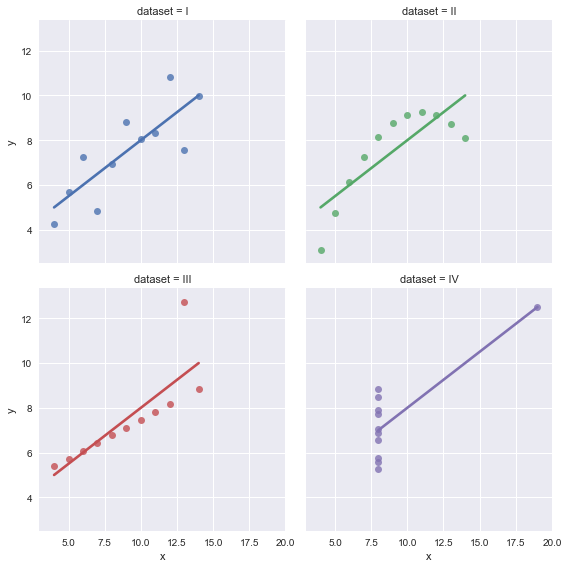

In [3]:
df = sns.load_dataset('anscombe')

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, ci=None, height=4, order=1)
plt.show()

In [4]:
data_1 = data.loc[data.data == 0, ['x', 'y']]
data_2 = data.loc[data.data == 1, ['x', 'y']]
data_3 = data.loc[data.data == 2, ['x', 'y']]
data_4 = data.loc[data.data == 3, ['x', 'y']]

In [5]:
pairs = (data_1.x, data_1.y), (data_2.x, data_2.y), (data_3.x, data_3.y), (data_4.x, data_4.y)

for x, y in pairs:
    print(" X Mean: " + str(np.mean(x)) + "\n",
          "Y Mean: " + str(np.mean(y)) + "\n",
          "X StDev" + str(np.std(x)) + "\n",
          "Y StDev" + str(np.std(y)) + "\n", 
          "Correlation Coefficient: " + str(np.corrcoef(x, y)[0][1]))
    print("===================================")

 X Mean: 9.0
 Y Mean: 7.500909090909093
 X StDev3.1622776601683795
 Y StDev1.937024215108669
 Correlation Coefficient: 0.81642051634484
 X Mean: 9.0
 Y Mean: 7.500909090909091
 X StDev3.1622776601683795
 Y StDev1.93710869148962
 Correlation Coefficient: 0.8162365060002428
 X Mean: 9.0
 Y Mean: 7.500000000000001
 X StDev3.1622776601683795
 Y StDev1.9359329439927313
 Correlation Coefficient: 0.8162867394895984
 X Mean: 9.0
 Y Mean: 7.50090909090909
 X StDev3.1622776601683795
 Y StDev1.9360806451340837
 Correlation Coefficient: 0.8165214368885028


### 2. Perform simple linear regression. Check that the slopes and intercepts are almost the same. Check the accuracy measures. Investigate the corresponding diagnostic plots and explain which datasets follow the linear model.

In [6]:
def regr_with_coeffs_and_plots(df):
    for data in range(len(df)):
        X = df[data]["x"]
        y = df[data]["y"]
    
        X = sm.add_constant(X)
        lm = sm.OLS(y, X).fit()
    
        print("Regression coefficents are: " + str(list(lm.params)))
        print("----------------------------------------------------")
        print("R-squared value is: " + str(lm.rsquared))
        print("----------------------------------------------------")
        print(lm.summary())
        
        plt.figure(figsize = (10, 7))
        lmdiag.plot(lm)
        plt.show()

Regression coefficents are: [3.0000909090909085, 0.5000909090909091]
----------------------------------------------------
R-squared value is: 0.666542459508775
----------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 06 May 2020   Prob (F-statistic):            0.00217
Time:                        23:48:22   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                       

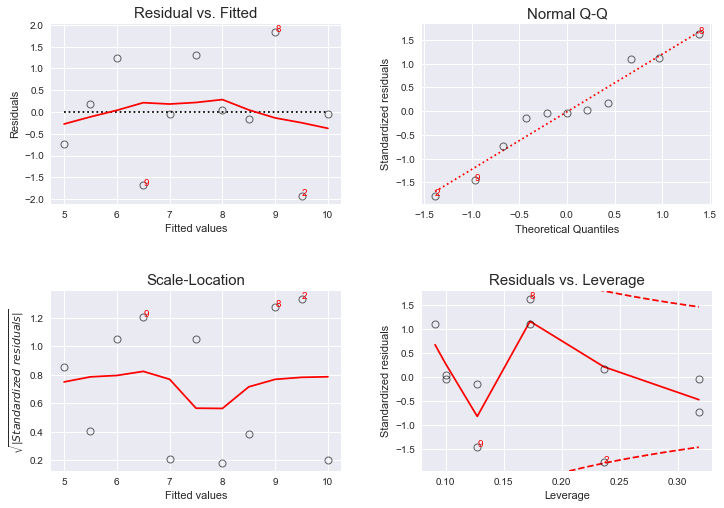

Regression coefficents are: [3.0009090909090905, 0.5]
----------------------------------------------------
R-squared value is: 0.6662420337274844
----------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 06 May 2020   Prob (F-statistic):            0.00218
Time:                        23:48:23   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
           

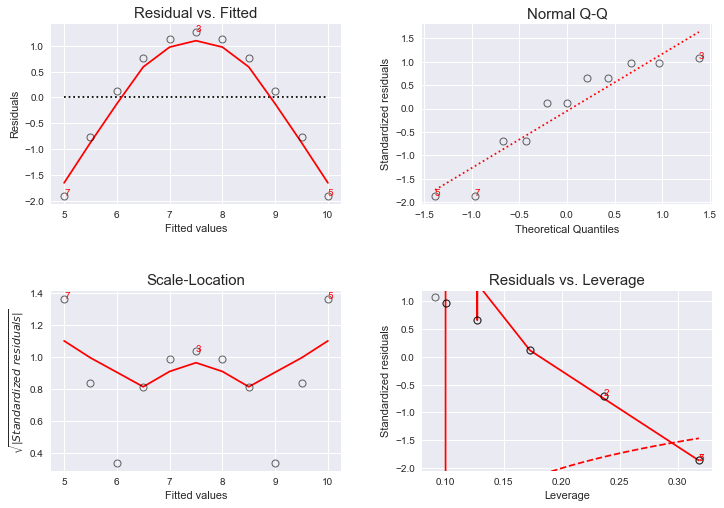

Regression coefficents are: [3.0024545454545453, 0.49972727272727285]
----------------------------------------------------
R-squared value is: 0.6663240410665593
----------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 06 May 2020   Prob (F-statistic):            0.00218
Time:                        23:48:23   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                     

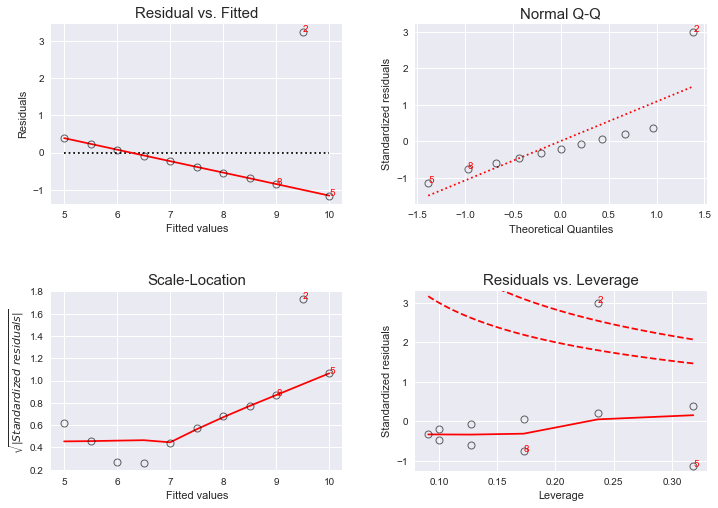

In [7]:
x = [data_1, data_2, data_3]

regr_with_coeffs_and_plots(x)

Examining the output of the above cell, we can clearly see that for these datasets linear regression coefficients are almost equal to each other as well as R-squared values. Although from the diagnostic plots, it is obvious that data_2 is not appropriate to derive conclusions using linear regression method, since Residual vs. Fitted graph clearly shows that the points are not equally spread about the red line. Same can be assumed for data_3 dataset.